In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the Loan data

LoanData = pd.read_csv(r"loan_data.csv", header=0)

# Copy to back-up file

LoanData_bk = LoanData.copy()

# Display first 5 values

LoanData.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# Display the Loan data information

LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# Change the name of variable

LoanData = LoanData.rename(columns = {'not.fully.paid': 'NFPaid'}, inplace = False)

# Copy the file to backup

LoanData_bk2 = LoanData.copy()

# Display first 5 records

LoanData.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (>= 10 : 1, then the dataset is imbalance dataset)
                    
Target_count = LoanData.NFPaid.value_counts()
print('Class 0:', Target_count[0])
print('Class 1:', Target_count[1])
print('Proportion:', round(Target_count[0] / Target_count[1], 2), ': 1')
print('Total loans Trans:', len(LoanData))

Class 0: 8045
Class 1: 1533
Proportion: 5.25 : 1
Total loans Trans: 9578


In [6]:
# Displaying Duplicate values with in Loan ataset, if avialble

LoanData_dup = LoanData[LoanData.duplicated(keep='last')]
LoanData_dup

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid


In [7]:
# Count the missing values by each variable, if available

LoanData.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
NFPaid               0
dtype: int64

In [8]:
# Display the 'purpose' variable by sub-variable count

LoanData['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [9]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

LoanData['purpose'] = LE.fit_transform(LoanData[['purpose']])

In [10]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in LoanData.columns:
    if col != 'NFPaid':
        IndepVar.append(col)

TargetVar = 'NFPaid'

x = LoanData[IndepVar]
y = LoanData[TargetVar]

In [11]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the shape of train and test data 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6704, 13), (2874, 13), (6704,), (2874,))

In [12]:
# Display all the variable in the loan dataset

LoanData.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'NFPaid'],
      dtype='object')

In [13]:
# Identify variable which are suppose to normilize the values

mm_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

In [15]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[mm_cols] = mmscaler.fit_transform(x_train[mm_cols])
x_train = pd.DataFrame(x_train)

x_test[mm_cols] = mmscaler.fit_transform(x_test[mm_cols])
x_test = pd.DataFrame(x_test)

# RandomForest Algorithm

Confusion matrix : 
 [[  13  453]
 [  12 2396]]
Outcome values : 
 13 453 12 2396
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.03      0.05       466
           0       0.84      1.00      0.91      2408

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.48      2874
weighted avg       0.79      0.84      0.77      2874

Accuracy : 83.8 %
Precision : 52.0 %
Recall : 2.8 %
F1 Score : 0.053
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 51.1 %
MCC : 0.091
roc_auc_score: 0.511


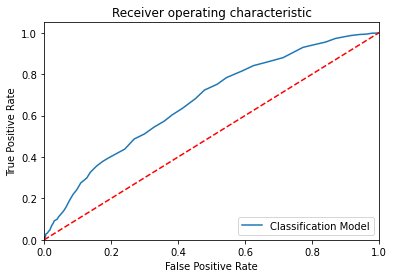

-----------------------------------------------------------------------------------------------------


In [16]:
# To build the 'Random Forest' model with random sampling

from sklearn.ensemble import RandomForestClassifier

ModelRF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                 ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#--------------------------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

Feature: 0, Score: 0.01306
Feature: 1, Score: 0.04290
Feature: 2, Score: 0.10274
Feature: 3, Score: 0.11750
Feature: 4, Score: 0.11171
Feature: 5, Score: 0.11298
Feature: 6, Score: 0.08013
Feature: 7, Score: 0.11630
Feature: 8, Score: 0.11379
Feature: 9, Score: 0.11024
Feature: 10, Score: 0.05493
Feature: 11, Score: 0.01396
Feature: 12, Score: 0.00975


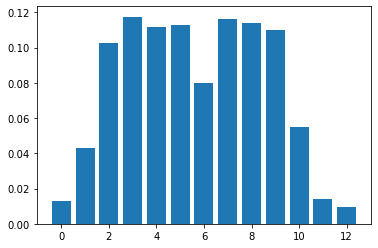

In [17]:
# To get feature importance

from matplotlib import pyplot

importance = ModelRF.feature_importances_

# Summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [18]:
# Results

PredResults = pd.DataFrame({'NFPaid':y_test, 'NFPaid':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = LoanData_bk2.merge(PredResults, left_index=True, right_index=True)

# Display the 10 records randomly

TestDataResults.sample(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid_x,NFPaid_y
1567,1,small_business,0.1146,164.79,10.824806,13.09,717,1260.041667,2042,13.9,1,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0
2127,1,debt_consolidation,0.0963,577.70,10.551742,4.05,772,14167.000000,8259,42.8,2,0,0,0,0
720,1,all_other,0.1039,162.26,9.903488,14.82,702,2851.041667,4873,26.9,1,0,0,0,0
79,1,all_other,0.1091,130.79,9.798127,18.00,707,2192.000000,5533,79.6,1,0,0,0,0
2594,1,educational,0.1253,836.66,11.350407,16.24,762,5849.958333,93559,22.1,1,0,0,0,0
716,1,debt_consolidation,0.1197,398.40,11.350407,14.08,682,7230.041667,22205,88.8,2,0,1,0,0
2632,1,all_other,0.1411,684.58,11.350359,19.27,702,5489.958333,17811,79.2,1,0,0,0,0
919,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.000000,2751,16.7,0,0,0,0,0
1354,1,educational,0.1083,146.97,10.545341,13.54,712,3930.958333,1818,29.8,2,0,0,0,0


# Compare the Classification Algorithms

In [20]:
# Load the results dataset

EMResults = pd.read_csv(r"E:\SDP-2\S5-DTree\EMResults.csv", header=0)

# Display the first 5 records

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[   9  457]
 [   8 2400]]
Outcome values : 
 9 457 8 2400
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.02      0.04       466
           0       0.84      1.00      0.91      2408

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.47      2874
weighted avg       0.79      0.84      0.77      2874

Accuracy : 83.8 %
Precision : 52.9 %
Recall : 1.9 %
F1 Score : 0.037
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 50.8 %
MCC : 0.077
roc_auc_score: 0.508


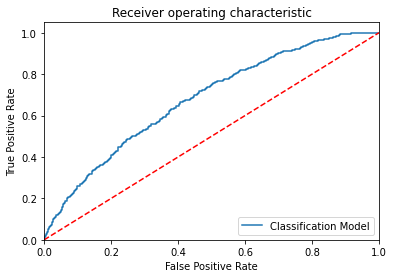

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 120  346]
 [ 442 1966]]
Outcome values : 
 120 346 442 1966
Classification report : 
               precision    recall  f1-score   support

           1       0.21      0.26      0.23       466
           0       0.85      0.82      0.83      2408

    accuracy                           0.73      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.75      0.73      0.74      2874

Accuracy : 72.6 %
Precision : 21.4 %
Recall : 25.8 %
F1 Score : 0.233
Specificity or True Negative Rate : 81.6 %
Balanced Accuracy : 53.7 %
MCC : 0.069
roc_auc_score: 0.537


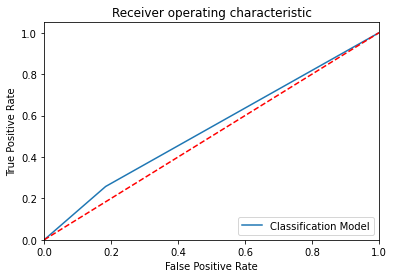

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[   9  457]
 [  24 2384]]
Outcome values : 
 9 457 24 2384
Classification report : 
               precision    recall  f1-score   support

           1       0.27      0.02      0.04       466
           0       0.84      0.99      0.91      2408

    accuracy                           0.83      2874
   macro avg       0.56      0.50      0.47      2874
weighted avg       0.75      0.83      0.77      2874

Accuracy : 83.3 %
Precision : 27.3 %
Recall : 1.9 %
F1 Score : 0.036
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 50.4 %
MCC : 0.032
roc_auc_score: 0.505


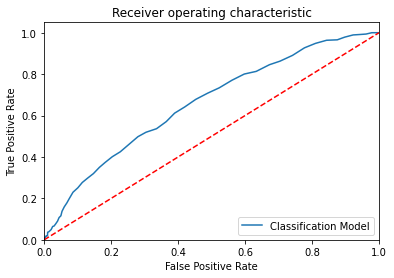

-----------------------------------------------------------------------------------------------------


In [21]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
# import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
#ModelET = ExtraTreesClassifier()
#ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelGNB = GaussianNB()
#ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
#ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #---

In [23]:
# Results with comparing the all the algorithms 

EMResults.to_csv("E:\SDP-2\S5-DTree\EMResults_02.csv")

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),9,457,8,2400,0.838,0.529,0.019,0.037,0.997,0.077,0.507996,0.508
1,DecisionTreeClassifier(),120,346,442,1966,0.726,0.214,0.258,0.233,0.816,0.069,0.536978,0.537
2,"(DecisionTreeClassifier(max_features='sqrt', r...",9,457,24,2384,0.833,0.273,0.019,0.036,0.99,0.032,0.504673,0.504
